## 01. Visualizing your data 

"Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this."

In [27]:
# Import pandas and upload the dataset
import pandas as pd
df=pd.read_csv('datasets/gapminder.csv',index_col=[0])

#create a subset 1800-1899: g1800s
cols_g1800s=[df.columns[-1]]+df.columns.tolist()[:100]
g1800s=df[cols_g1800s][:260]
g1800s.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


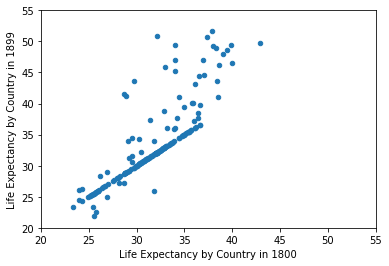

In [3]:
# Create the scatter plot
import matplotlib.pyplot as plt
g1800s.plot(kind='scatter', x='1800', y='1899')
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')
plt.xlim(20, 55)
plt.ylim(20, 55)
plt.show()

## 2. Thinking about the question at hand

"Before continuing, however, it's important to make sure that the following assumptions about the data are true:

- 'Life expectancy' is the first column (index 0) of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to 0.
- There is only one instance of each country."

In [4]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1 #index [0] - result contains the most frequently occuring value

## 3. Assembling your data

"Your task in this exercise is to concatenate them into a single DataFrame called gapminder. This is a row-wise concatenation..."

In [29]:
# create subsets as in the exercise
cols_g1900s=[df.columns[-1]]+df.columns.tolist()[100:200]
g1900s=df[cols_g1900s][:260]

cols_g2000s=[df.columns[-1]]+df.columns.tolist()[200:-1]
g2000s=df[cols_g2000s][:260]

# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s,g1900s,g2000s])
print(gapminder.shape)
gapminder.head()

(780, 218)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


## 4. Reshaping your data

"What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country."

In [6]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder,id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country','year','life_expectancy']
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


## 5. Checking the data types

"you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64"

In [7]:
import numpy as np
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year) #or gapminder.year = gapminder.year.to_numeric()

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64 

## 6. Looking at country spellings

"It is reasonable to assume that country names will contain:

- The set of lower and upper case letters.
- Whitespace between words.
- Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions"

In [8]:
# Create the series of countries: countries
countries = gapminder_melt.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)
# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]
invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

## 7. More data cleaning and processing

"In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have NaN in the life_expectancy column."

In [9]:
gapminder1=gapminder_melt
print(gapminder1.shape)

# Assert that country does not contain any missing values
assert pd.notnull(gapminder1.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder1.year).all()

# Drop the missing values
gapminder1 = gapminder1.dropna()

# Print the shape of gapminder
print(gapminder1.shape)

(169260, 3)
(20100, 3)


## 8. Wrapping up
"In this exercise, you'll begin by creating a histogram of the life_expectancy column. You should not get any values under 0 and you should see something reasonable on the higher end of the life_expectancy age range."

"Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values."

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
1895    32.811841
1896    32.895224
1897    32.964279
1898    32.994080
1899    32.962985
Name: life_expectancy, dtype: float64


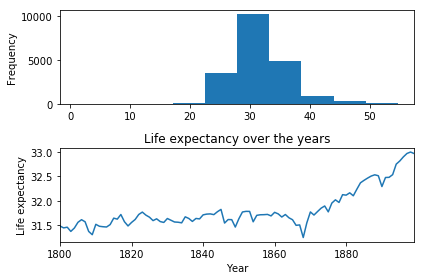

In [19]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder1.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder1.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
#gapminder.to_csv('gapminder_new.csv')
#gapminder_agg.to_csv('gapminder_agg.csv')

DataCamp does not provide the full Gapminder dataset (NaN values for 1900s and 2000s), so, the graphs in part 8 are only for the 1800s. See https://www.gapminder.org and https://www.datacamp.com/.